# **购物车词云分析**

###**数据集装载**

In [ ]:
#加载数据，需要从本地到云盘，再用colab装载云盘
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
## 上面%命令后面不能用##注释

In [ ]:
#读取数据
import pandas as pd

In [ ]:
##在读取csv如果第一行不是标题而是数据，需要给定headers=None,同时用names参数指定列名（注意不是columns），以及headers代表从第几行开始，默认为0，第0行即为标题
df=pd.read_csv("./数据可视化/Market_Basket_Optimisation.csv",header=None,names=[_ for _ in range(1,21)])    #上面不用cd切换根目录也可以的，在读取的时候把链接补充完整就可以了
print(df)

                 1                  2   ...       19         20
0            shrimp            almonds  ...  spinach  olive oil
1           burgers          meatballs  ...      NaN        NaN
2           chutney                NaN  ...      NaN        NaN
3            turkey            avocado  ...      NaN        NaN
4     mineral water               milk  ...      NaN        NaN
...             ...                ...  ...      ...        ...
7496         butter         light mayo  ...      NaN        NaN
7497        burgers  frozen vegetables  ...      NaN        NaN
7498        chicken                NaN  ...      NaN        NaN
7499       escalope          green tea  ...      NaN        NaN
7500           eggs    frozen smoothie  ...      NaN        NaN

[7501 rows x 20 columns]


In [ ]:
df.describe()       #整体数据描述性统计

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,protein bar,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [ ]:
#因为是购物小票，列不具有意义，直接分词进行统计就好了


###**直接分词**

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize    
import matplotlib.pyplot as plt
#中文分词工具jieba，英文分词工具NLTK
# nltk.download('punkt') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#实在搞不定了，手动分词
words=[]
for i in range(1,21):
  for index,value in df[i].items():
    if value!=value:        #判断一个值是否等于 NaN，只能用 value !== value 
      pass
    else:
      words.append(value)
print(words)
  # for words in word_tokenize(str(df[i])):
  #   print(words)

['shrimp', 'burgers', 'chutney', 'turkey', 'mineral water', 'low fat yogurt', 'whole wheat pasta', 'soup', 'frozen vegetables', 'french fries', 'eggs', 'cookies', 'turkey', 'spaghetti', 'mineral water', 'mineral water', 'shrimp', 'turkey', 'turkey', 'meatballs', 'red wine', 'rice', 'spaghetti', 'burgers', 'eggs', 'parmesan cheese', 'ground beef', 'sparkling water', 'mineral water', 'frozen vegetables', 'herb & pepper', 'mineral water', 'turkey', 'frozen vegetables', 'cookies', 'pickles', 'energy bar', 'red wine', 'mineral water', 'pickles', 'spaghetti', 'fresh tuna', 'spaghetti', 'soup', 'escalope', 'soup', 'mineral water', 'mineral water', 'avocado', 'burgers', 'spaghetti', 'fresh tuna', 'spaghetti', 'spaghetti', 'french fries', 'tomato sauce', 'turkey', 'eggs', 'soup', 'turkey', 'spaghetti', 'clothes accessories', 'energy drink', 'soup', 'turkey', 'french fries', 'chocolate', 'herb & pepper', 'cookies', 'shrimp', 'grated cheese', 'burgers', 'cookies', 'yogurt cake', 'soup', 'cookies'

In [ ]:
words=str(words).replace("'","")
print(words)

[shrimp, burgers, chutney, turkey, mineral water, low fat yogurt, whole wheat pasta, soup, frozen vegetables, french fries, eggs, cookies, turkey, spaghetti, mineral water, mineral water, shrimp, turkey, turkey, meatballs, red wine, rice, spaghetti, burgers, eggs, parmesan cheese, ground beef, sparkling water, mineral water, frozen vegetables, herb & pepper, mineral water, turkey, frozen vegetables, cookies, pickles, energy bar, red wine, mineral water, pickles, spaghetti, fresh tuna, spaghetti, soup, escalope, soup, mineral water, mineral water, avocado, burgers, spaghetti, fresh tuna, spaghetti, spaghetti, french fries, tomato sauce, turkey, eggs, soup, turkey, spaghetti, clothes accessories, energy drink, soup, turkey, french fries, chocolate, herb & pepper, cookies, shrimp, grated cheese, burgers, cookies, yogurt cake, soup, cookies, mineral water, eggs, grated cheese, mint, eggs, burgers, mineral water, burgers, energy bar, energy bar, chocolate, low fat yogurt, asparagus, burgers

###**wordcloud词云图**

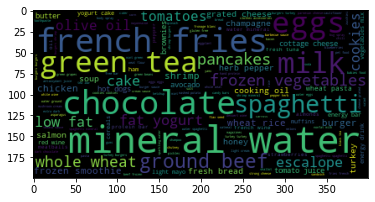

In [ ]:
cloud=WordCloud(width=400,height=200).generate(str(words))
plt.imshow(cloud)
cloud.to_file("./数据可视化/cloud_all.png")


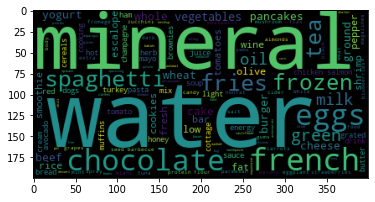

In [ ]:
cloud=WordCloud(width=400,height=200,collocations=False).generate(str(words))   #取消单词搭配，使得每个单词单独统计，这里、不是我需要的效果
plt.imshow(cloud)
cloud.to_file("./数据可视化/cloud_all_collocation.png")

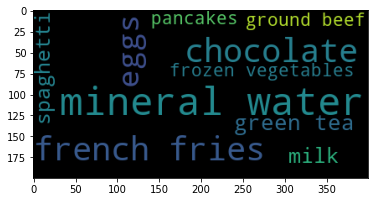

In [ ]:
cloud2=WordCloud(width=400,height=200,max_words=10).generate(str(words))    #用max_words参数来显示qian
plt.imshow(cloud2)
cloud2.to_file("./数据可视化/cloud_10.png")

In [ ]:
# WordCloud().generate_from_frequencies(freq) 可以根据 {商品:频数}的字典生成词云图； 
# WordCloud().process_text(text) 可以从一整串字符串中统计出每个空格隔开的单词出现的频数，并以{商品:频数}的字典形式返回；
# generate_from_frequencies()、process_text()连用所得到的结果，与generate()的结果相同，不同的地方在于，我们可以在process_text()的结果中得到它们的频数。

# **上面是渣渣代码，下面是一些可以改进的地方**

##
**改进1：dataframe可以按行读取，这样就不需要上面过程中的双重循环分割以及空值处理了**

In [ ]:
import pandas as pd
df=pd.read_csv(r"/content/drive/MyDrive/数据可视化/Market_Basket_Optimisation.csv",
      sep="\t",            #按整行读取
      header=None,          #没有标题，一定要设置header=None
      names=["items"],        #names指向一个列表
)
df

,items
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [ ]:
# #把csv逗号分隔符后面的空格替换掉
# df["items"]=df["items"].str.replace(", ",",")
# df

In [ ]:
##df[].str用法,生成pandas.core.strings.StringMethods对象，进行字符串处理，后面可以调用replace
df["items"]=df["items"].str.replace(" ","_")      #修改完成后要重新赋值
df

,items
0,"shrimp,almonds,avocado,vegetables_mix,green_gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral_water,milk,energy_bar,whole_wheat_rice..."
...,...
7496,"butter,light_mayo,fresh_bread"
7497,"burgers,frozen_vegetables,eggs,french_fries,ma..."
7498,chicken
7499,"escalope,green_tea"


In [ ]:
##str.contains用法，判断df字段中是否包含某些字符,返回布尔值
df["items"].str.contains(pat=" ")

0       False
1       False
2       False
3       False
4       False
        ...  
7496    False
7497    False
7498    False
7499    False
7500    False
Name: items, Length: 7501, dtype: bool

In [ ]:
#对于str.contains对象再接.sum()方法统计包含目标字符串的样本数（即行数，布尔值求和）
df["items"].str.contains(pat=" ").sum()

0

In [ ]:
#将每一行拼接成一个大字符串，cat函数，测试一下wordcloud用逗号能不能分隔，应该是可以的
words=df["items"].str.cat(sep=",")  #分隔符用sep参数设定，和read_csv中的参数一样
words

'shrimp,almonds,avocado,vegetables_mix,green_grapes,whole_weat_flour,yams,cottage_cheese,energy_drink,tomato_juice,low_fat_yogurt,green_tea,honey,salad,mineral_water,salmon,antioxydant_juice,frozen_smoothie,spinach,olive_oil,burgers,meatballs,eggs,chutney,turkey,avocado,mineral_water,milk,energy_bar,whole_wheat_rice,green_tea,low_fat_yogurt,whole_wheat_pasta,french_fries,soup,light_cream,shallot,frozen_vegetables,spaghetti,green_tea,french_fries,eggs,pet_food,cookies,turkey,burgers,mineral_water,eggs,cooking_oil,spaghetti,champagne,cookies,mineral_water,salmon,mineral_water,shrimp,chocolate,chicken,honey,oil,cooking_oil,low_fat_yogurt,turkey,eggs,turkey,fresh_tuna,tomatoes,spaghetti,mineral_water,black_tea,salmon,eggs,chicken,extra_dark_chocolate,meatballs,milk,honey,french_fries,protein_bar,red_wine,shrimp,pasta,pepper,eggs,chocolate,shampoo,rice,sparkling_water,spaghetti,mineral_water,ham,body_spray,pancakes,green_tea,burgers,grated_cheese,shrimp,pasta,avocado,honey,white_wine,toothp

###wordclout改进，可以设置mask词云形状

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

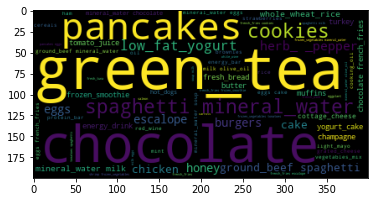

In [ ]:
#测试逗号分隔
wc_1=WordCloud().generate(words)
plt.imshow(wc_1)        #结果不对，怀疑数据预处理中csv逗号分隔符后面的空格影响了结果

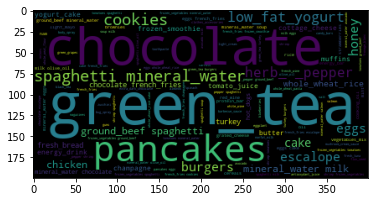

In [ ]:
#处理逗号分隔符中的空格
words2=words.replace(", ",",")
wc_2=WordCloud().generate(words2)
plt.imshow(wc_2)       #结果还是不对，怀疑上面数据预处理时把空格换成下划线步骤错误，回去上面重新修改

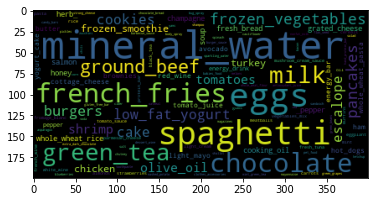

In [ ]:
#再试一次，最后发现不是逗号分隔值的问题，是collocation参数的问题，虽然我还是不明白为什么，但我大受震撼
wc_3=WordCloud(collocations=False).generate(words)
plt.imshow(wc_3) 

In [ ]:
#看一下两种方法字符频数的对比
freq1=WordCloud().process_text(words)
order1=sorted(freq1.items(),key=lambda x:x[1],reverse=True)    #字典排序，dic.items()返回tuple元组，lambda函数说明对元组的第二个值进行排序，果然排第一的是绿茶不对惹，我太难了
print(order1)

[('green_tea', 792), ('chocolate', 610), ('pancakes', 508), ('spaghetti mineral_water', 454), ('cookies', 440), ('low_fat_yogurt', 421), ('herb_ _pepper', 371), ('eggs', 302), ('escalope', 292), ('burgers', 291), ('honey', 287), ('cake', 257), ('ground_beef spaghetti', 248), ('chicken', 244), ('mineral_water milk', 243), ('whole_wheat_rice', 239), ('fresh_bread', 210), ('chocolate french_fries', 206), ('turkey', 201), ('frozen_smoothie', 196), ('yogurt_cake', 191), ('champagne', 188), ('tomato_juice', 173), ('muffins', 169), ('butter', 167), ('energy_drink', 166), ('cottage_cheese', 165), ('mineral_water chocolate', 164), ('hot_dogs', 159), ('ground_beef mineral_water', 159), ('light_mayo', 158), ('mineral_water soup', 156), ('grated_cheese', 150), ('brownies', 149), ('energy_bar', 148), ('mineral_water eggs', 147), ('eggs french_fries', 145), ('vegetables_mix', 144), ('oil', 142), ('cereals', 140), ('red_wine', 137), ('eggs cake', 136), ('ham', 135), ('strawberries', 135), ('cooking_o

In [ ]:
#看一下两种方法字符频数的对比
freq2=WordCloud(collocations=False).process_text(words)
order2=sorted(freq2.items(),key=lambda x:x[1],reverse=True)    #我好想有点明白了，上面那种方法会把组合也考虑进去，下面是严格按照分隔符进行统计的
print(order2)

[('mineral_water', 1788), ('eggs', 1348), ('spaghetti', 1306), ('french_fries', 1282), ('chocolate', 1230), ('green_tea', 991), ('milk', 972), ('ground_beef', 737), ('frozen_vegetables', 715), ('pancakes', 713), ('burgers', 654), ('cake', 608), ('cookies', 603), ('escalope', 595), ('low_fat_yogurt', 574), ('shrimp', 536), ('tomatoes', 513), ('olive_oil', 494), ('frozen_smoothie', 475), ('turkey', 469), ('chicken', 450), ('whole_wheat_rice', 439), ('grated_cheese', 393), ('cooking_oil', 383), ('soup', 379), ('herb_', 371), ('_pepper', 371), ('honey', 356), ('champagne', 351), ('fresh_bread', 323), ('salmon', 319), ('brownies', 253), ('avocado', 250), ('hot_dogs', 243), ('cottage_cheese', 239), ('tomato_juice', 228), ('butter', 226), ('whole_wheat_pasta', 221), ('red_wine', 211), ('yogurt_cake', 205), ('light_mayo', 204), ('energy_bar', 203), ('ham', 203), ('energy_drink', 200), ('pepper', 199), ('vegetables_mix', 193), ('cereals', 193), ('muffins', 181), ('oil', 173), ('french_wine', 16

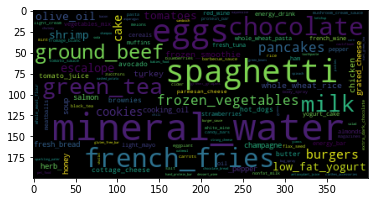

In [ ]:
##WordColud().process_text()+WordCloud().generate_from_freq()等于WordCloud().generate(),但是前一种方法可以看到词频数
wc_4=WordCloud().generate_from_frequencies(freq2)
plt.imshow(wc_4)

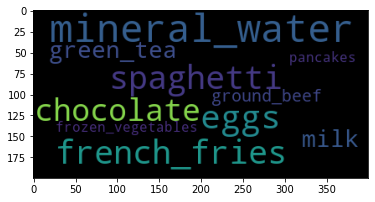

In [ ]:
#统计前十的商品数据
wc_5=WordCloud(max_words=10).generate_from_frequencies(freq2)
plt.imshow(wc_5)

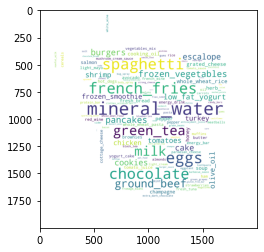

In [81]:
##设置词云形状,需要将图片读取为数组
from PIL import Image
import numpy as np
filename=r"/content/drive/MyDrive/数据可视化/购物篮可视化/shopping_cart_mask.png"
maskarray=np.array(Image.open(filename))        #Image.open记住了，没有read
wc_6=WordCloud(mask=maskarray,background_color="white").generate_from_frequencies(freq2)
plt.imshow(wc_6)
wc_6.to_file("/content/drive/MyDrive/数据可视化/购物篮可视化/wc_result_with_mask.png")     #to_file不是to_image